<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/labs/04-wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

# BYU CS 180 Lab 4: Data Wrangling

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”. 

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

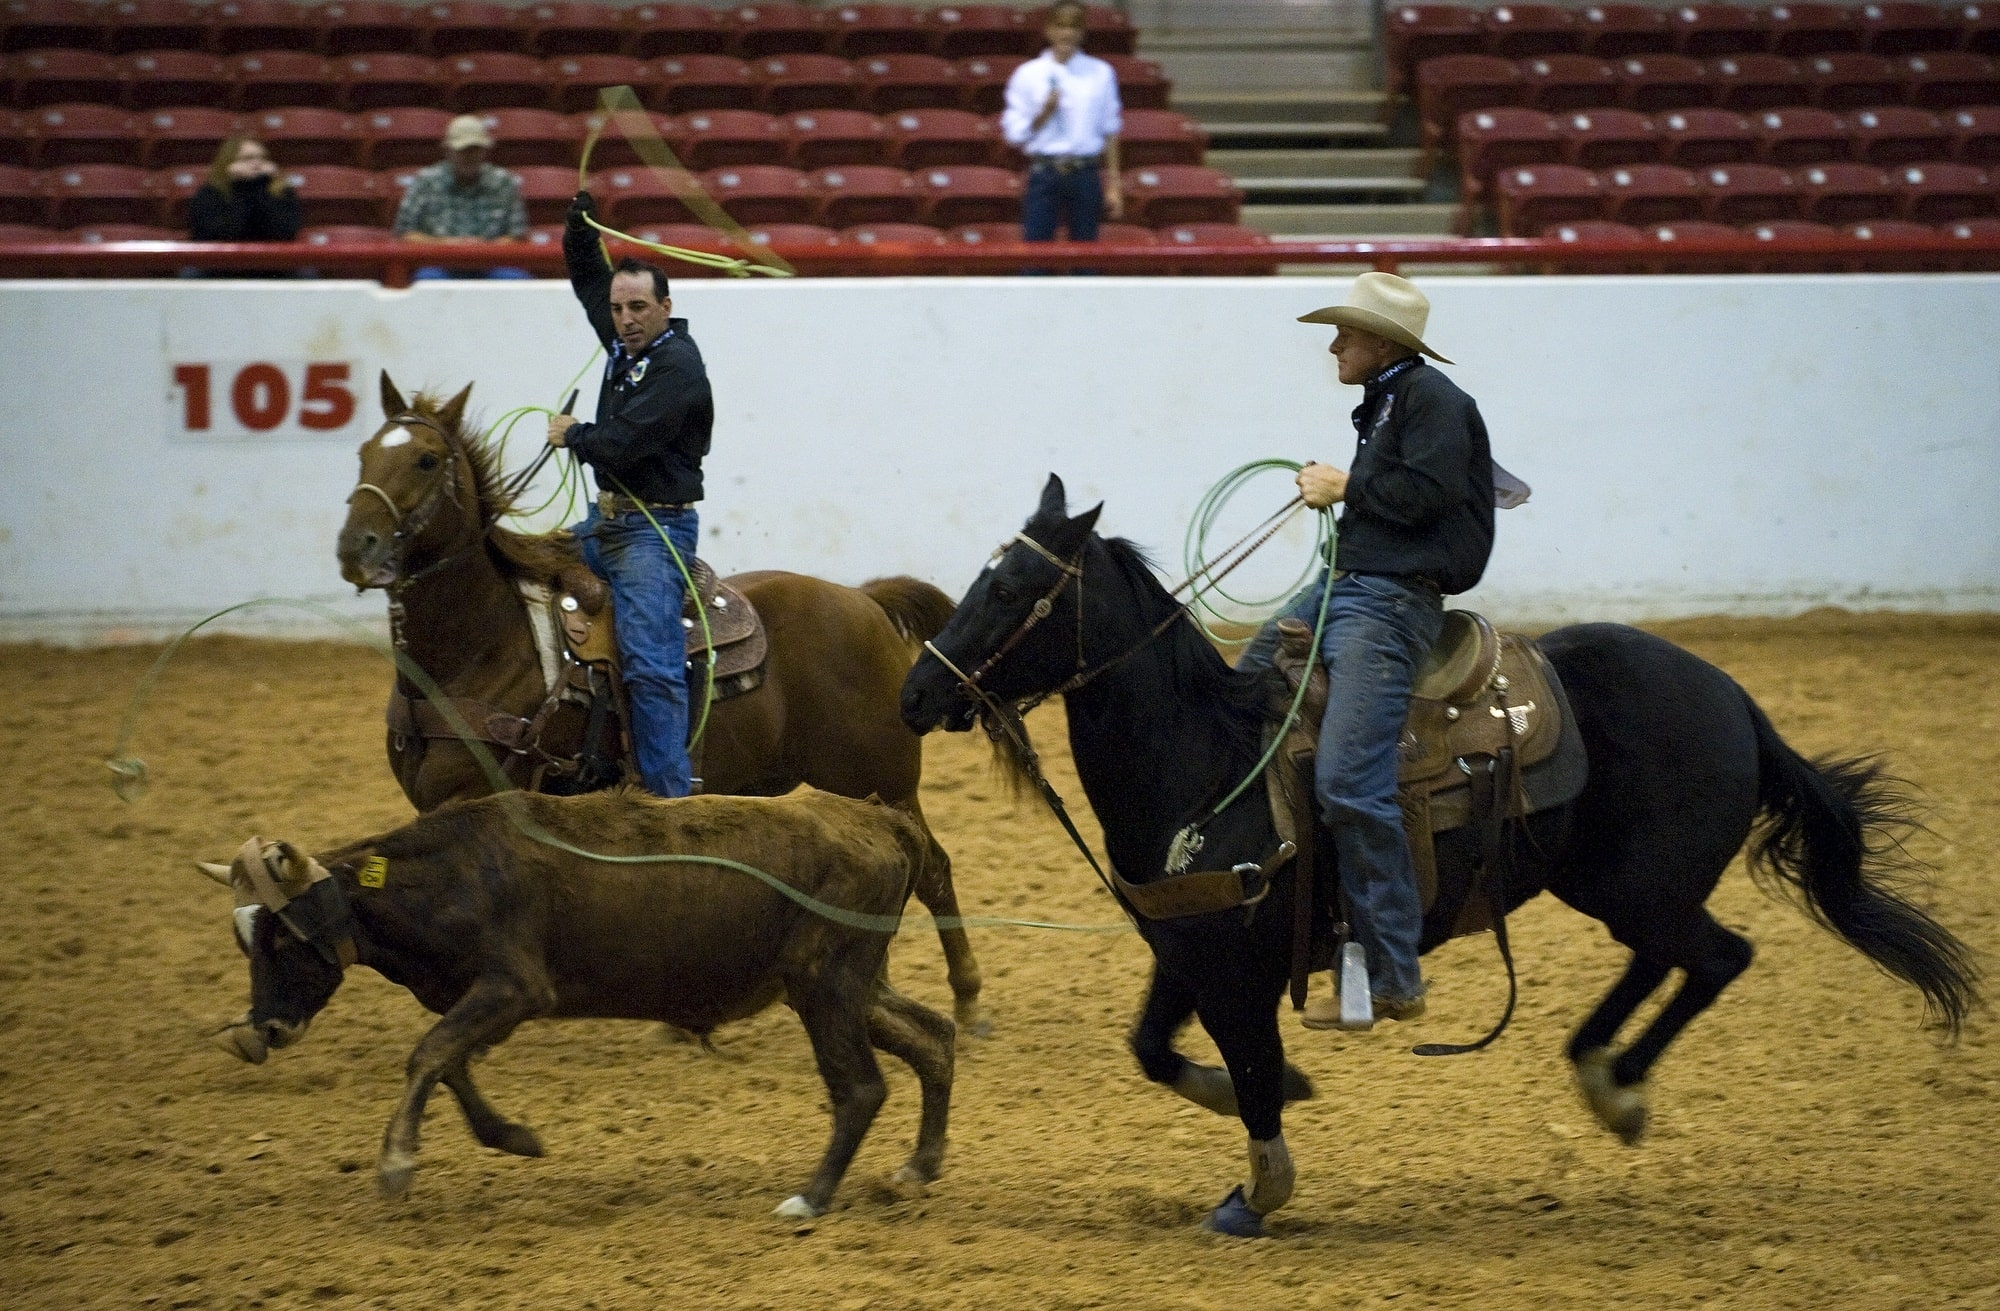

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1. 

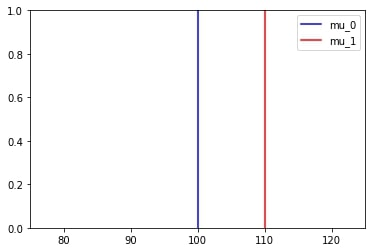

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability. 

When we plot the **variability and the mean**, we observe the following plot:

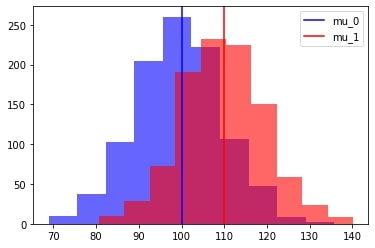

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0. 

Now suppose we observe the following plot:

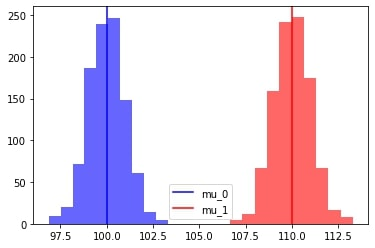

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [15]:
# Download the data located at the following URLs
cfb16_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb16.csv"
cfb17_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb17.csv"
cfb18_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb18.csv"
cfb19_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb19.csv"
cfb20_url = "https://raw.githubusercontent.com/rhodes-byu/cs180-winter25/refs/heads/main/labs/data/cfb20.csv"

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [16]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
df16 = pd.read_csv(cfb16_url)
df17 = pd.read_csv(cfb17_url)
df18 = pd.read_csv(cfb18_url)
df19 = pd.read_csv(cfb19_url)
df20 = pd.read_csv(cfb20_url)
df16['Year'] = 2016
df17['Year'] = 2017
df18['Year'] = 2018
df19['Year'] = 2019
df20['Year'] = 2020
df20.head()

C:\Users\isaac\AppData\Local\Temp\ipykernel_10036\369757407.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df16['Year'] = 2016
C:\Users\isaac\AppData\Local\Temp\ipykernel_10036\369757407.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df17['Year'] = 2017
C:\Users\isaac\AppData\Local\Temp\ipykernel_10036\369757407.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(a

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,...,58,3,5,8,5,3,8,0,0.00,2020
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,...,98,4,2,6,3,6,9,-3,-0.50,2020
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,...,12,10,11,21,7,4,11,10,0.91,2020
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,...,57,3,15,18,6,11,17,1,0.08,2020
4,Arizona (Pac-12),5,0,5,86,373,1847,4.95,10,369.4,...,126,1,2,3,5,7,12,-9,-1.80,2020


## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [17]:
# Write your code to combine all of the csvs into one dataframe here:
df = pd.concat((df16, df17, df18, df19, df20))
df

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,114,6,8,14,8,14,22,-8,-0.67,2016
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,17,13,16,29,10,9,19,10,0.67,2016
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,18,1,20,21,5,8,13,8,0.62,2016
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,112,6,8,14,9,12,21,-7,-0.58,2016
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,93,8,9,17,7,14,21,-4,-0.33,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,42,2,10,12,6,3,9,3,0.33,2020
123,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,83,4,5,9,10,2,12,-3,-0.27,2020
124,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,98,1,2,3,4,2,6,-3,-0.50,2020
125,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,98,4,4,8,5,6,11,-3,-0.50,2020


## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.

Example: 

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [18]:
# Write your code to parse the conference from the team name:
df['Conference'] = df['Team'].str.extract(r"\((.*?)\)")
df

C:\Users\isaac\AppData\Local\Temp\ipykernel_10036\3075101675.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Conference'] = df['Team'].str.extract(r"\((.*?)\)")


,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,...,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,Conference
0,Akron (MAC),12,5,7,84,776,4649,5.99,38,387.4,...,6,8,14,8,14,22,-8,-0.67,2016,MAC
1,Alabama (SEC),15,14,1,34,1056,6829,6.47,59,455.3,...,13,16,29,10,9,19,10,0.67,2016,SEC
2,Appalachian St. (Sun Belt),13,10,3,52,912,5589,6.13,45,429.9,...,1,20,21,5,8,13,8,0.62,2016,Sun Belt
3,Arizona (Pac-12),12,3,9,67,815,4957,6.08,39,413.1,...,6,8,14,9,12,21,-7,-0.58,2016,Pac-12
4,Arizona St. (Pac-12),12,5,7,81,900,4689,5.21,43,390.8,...,8,9,17,7,14,21,-4,-0.33,2016,Pac-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,422.7,...,2,10,12,6,3,9,3,0.33,2020,Big 12
123,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,290.9,...,4,5,9,10,2,12,-3,-0.27,2020,C-USA
124,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,479.7,...,1,2,3,4,2,6,-3,-0.50,2020,MAC
125,Wisconsin (Big Ten),6,3,3,93,431,2153,5.00,17,358.8,...,4,4,8,5,6,11,-3,-0.50,2020,Big Ten


## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Off.TDs`.

<Axes: xlabel='Off.Yards.per.Game', ylabel='Density'>

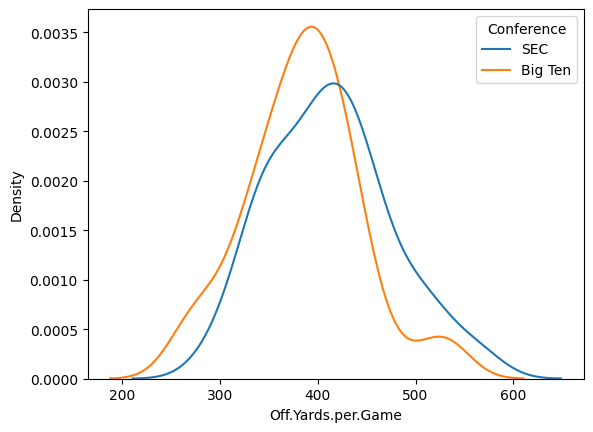

In [19]:
# Write the code for the statistical differences for Off.Yards.per.Game:
to_compare = df[df["Conference"].isin(["Big Ten", "SEC"])]
sns.kdeplot(data=to_compare, x='Off.Yards.per.Game', hue='Conference')

The two conferences are fairly comprable. The SEC has less hight on the graph so less of a percetage of the teams are hitting that middle point like the Big Ten but more of the volume is to the right of the Bg Ten so it means that more of the teams get more yards per game than the SEC.



<Axes: xlabel='Off.TDs', ylabel='Density'>

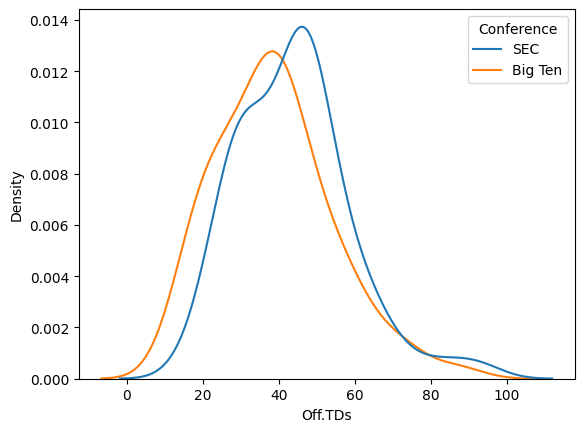

In [20]:
# Write the code for the statistical differences for Off.TDs:
to_compare_TD = df[df["Conference"].isin(["Big Ten", "SEC"])]
sns.kdeplot(data=to_compare_TD, x='Off.TDs', hue='Conference')


evem closer to than the last graph. more of the SEC teams scored more points than the Big Ten teams. denisty peak is not only higher but the SEC graph is almost always to the right of the Big Ten graph.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions. 

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Allowed`.



<Axes: xlabel='Points.Allowed', ylabel='Density'>

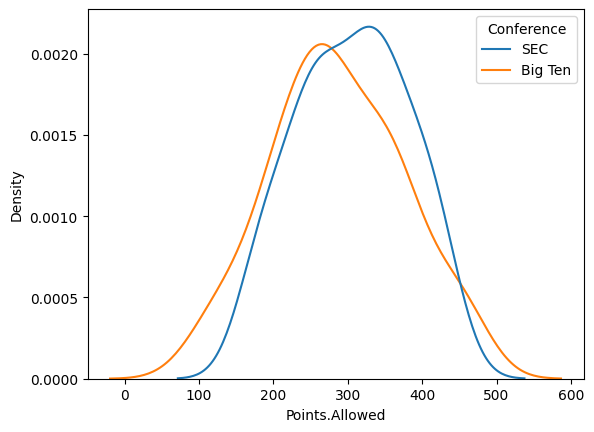

In [21]:
# Write the code for the statistical differences for Points.Allowed:
to_compare_TD = df[df["Conference"].isin(["Big Ten", "SEC"])]
sns.kdeplot(data=to_compare_TD, x='Points.Allowed', hue='Conference')

From this plot it looks like the SEC allowed more points on average with some acceptions (which based on the college ratings seems obsurd)

<Axes: xlabel='Opp.Pass.Yds.Allowed', ylabel='Density'>

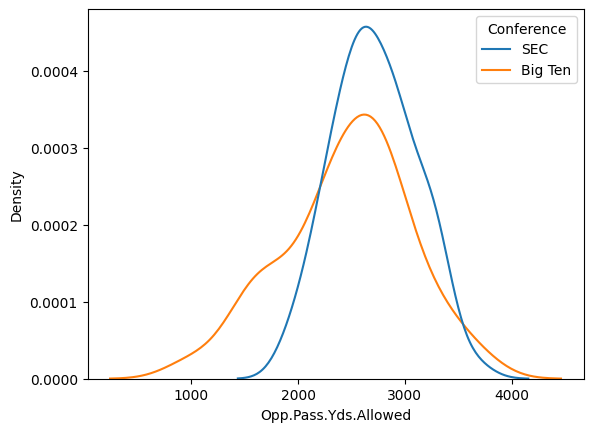

In [22]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
to_compare_TD = df[df["Conference"].isin(["Big Ten", "SEC"])]
sns.kdeplot(data=to_compare_TD, x='Opp.Pass.Yds.Allowed', hue='Conference')

The SEC is also allowing more passing yard. This seems to suggest that the SEC's defense is not as good as the Big Ten's defense but the SEC offense seems like its good enough to make up the difference.

<Axes: xlabel='Opp.Rush.Yards.Allowed', ylabel='Density'>

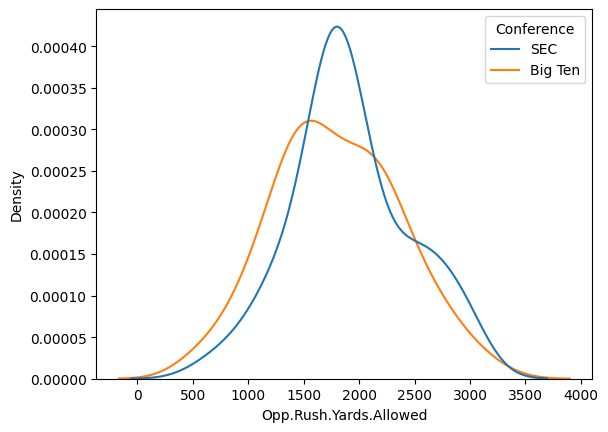

In [23]:
# Write the code for the statistical differences for Opp.Rush.Yards.Allowed:
to_compare_TD = df[df["Conference"].isin(["Big Ten", "SEC"])]
sns.kdeplot(data=to_compare_TD, x='Opp.Rush.Yards.Allowed', hue='Conference')

The SEC is a really tightly knit pack. Their grouping on these charts are usually very centralized. So it seems that the SEC is more homogenous but they allow a lot more yards (passing and rushing) but the low end of the Big Ten drags the whole conference down.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures. 

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

3606.0944946492273 3808.0231200048074 3352.53372393486 3456.231207100592 4744.467327174653


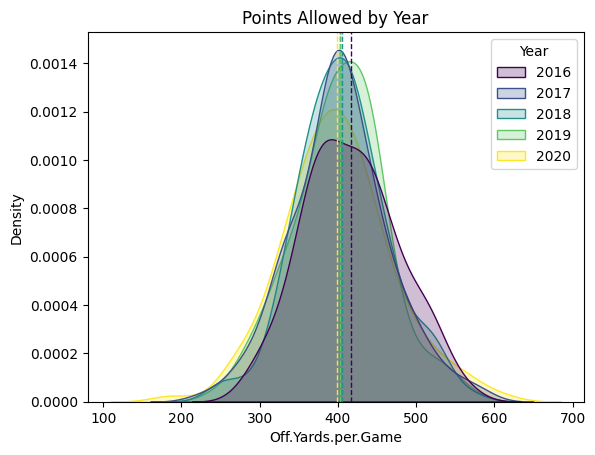

In [24]:
# Create a few plots showing how each metric changed over time:
plt.title('Points Allowed by Year')
category = 'Off.Yards.per.Game'
sns.kdeplot(data=df, x=category, palette='viridis', hue='Year', fill=True)
plt.axvline(np.mean(df16[category]), color='#440154', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df17[category]), color='#3b528b', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df18[category]), color='#21918c', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df19[category]), color='#5ec962', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df20[category]), color='#fde725', linestyle='dashed', linewidth=1, label='2016')
var16 = np.var(df16[category])
var17 = np.var(df17[category])
var18 = np.var(df18[category])
var19 = np.var(df19[category])
var20 = np.var(df20[category])
print(var16, var17, var18, var19, var20)


167.33791617122472 172.61703022654888 179.01724655970193 200.7668639053254 169.2236344472689


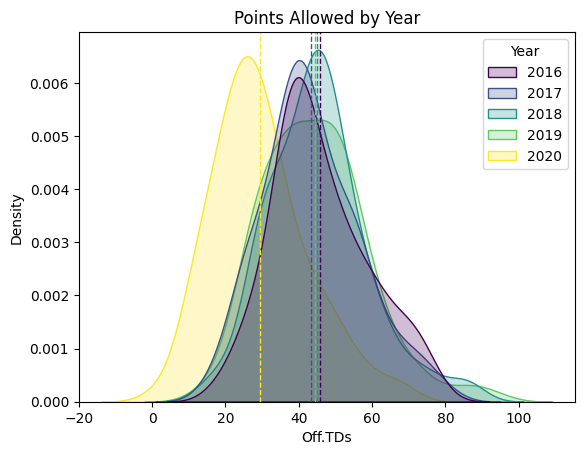

In [25]:
plt.title('Points Allowed by Year')
category = 'Off.TDs'
sns.kdeplot(data=df, x=category, palette='viridis', hue='Year', fill=True)
plt.axvline(np.mean(df16[category]), color='#440154', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df17[category]), color='#3b528b', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df18[category]), color='#21918c', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df19[category]), color='#5ec962', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df20[category]), color='#fde725', linestyle='dashed', linewidth=1, label='2016')
var16 = np.var(df16[category])
var17 = np.var(df17[category])
var18 = np.var(df18[category])
var19 = np.var(df19[category])
var20 = np.var(df20[category])
print(var16, var17, var18, var19, var20)

The offense has not really done any progressing over the last few years. It has stayed quite consistent with a mean around 400. If anything, offenses have gotten less productive as the years have gone by with a a loss in productivity after 2016. The majority of the data is overlapping for almost the entier graph so any difference is insignificant.

the only significant change in variability is in 2020 when it jumps 1000 points (for offensive yards gained) and losing about this could be because of some teams refusing to play during covid or it could be from the addition of other teams. 

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures. 

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

5726.993088585018 6335.743645213629 6722.733489573944 5784.590532544379 7391.76861553723


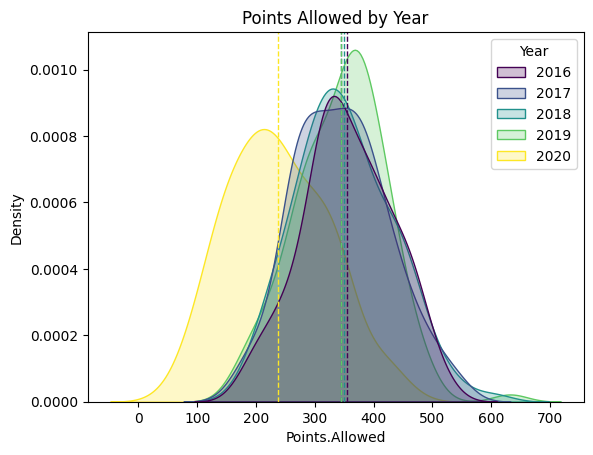

In [26]:
# Create a few plots showing how each metric changed over time:
plt.title('Points Allowed by Year')
category = 'Points.Allowed'
sns.kdeplot(data=df, x=category, palette='viridis', hue='Year', fill=True)
plt.axvline(np.mean(df16[category]), color='#440154', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df17[category]), color='#3b528b', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df18[category]), color='#21918c', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df19[category]), color='#5ec962', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df20[category]), color='#fde725', linestyle='dashed', linewidth=1, label='2016')
var16 = np.var(df16[category])
var17 = np.var(df17[category])
var18 = np.var(df18[category])
var19 = np.var(df19[category])
var20 = np.var(df20[category])
print(var16, var17, var18, var19, var20)

218802.46157847793 199866.99849768644 195130.16273060514 149564.43698224853 433224.4999689999


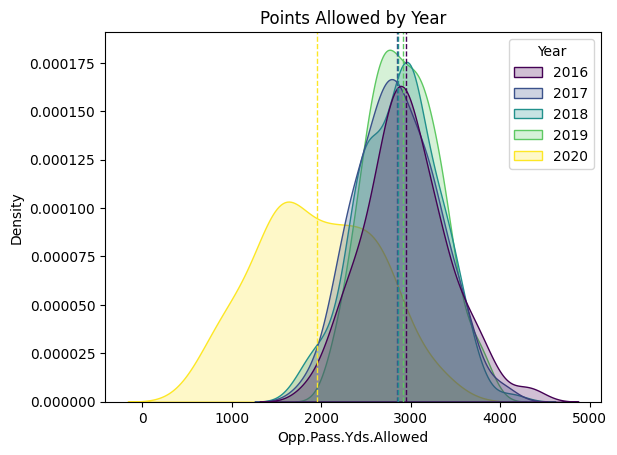

In [27]:
plt.title('Points Allowed by Year')
category = 'Opp.Pass.Yds.Allowed'
sns.kdeplot(data=df, x=category, palette='viridis', hue='Year', fill=True)
plt.axvline(np.mean(df16[category]), color='#440154', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df17[category]), color='#3b528b', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df18[category]), color='#21918c', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df19[category]), color='#5ec962', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df20[category]), color='#fde725', linestyle='dashed', linewidth=1, label='2016')
var16 = np.var(df16[category])
var17 = np.var(df17[category])
var18 = np.var(df18[category])
var19 = np.var(df19[category])
var20 = np.var(df20[category])
print(var16, var17, var18, var19, var20)

247867.72792806185 237462.61054023195 286191.24463674054 224978.9422485207 230516.95852191705


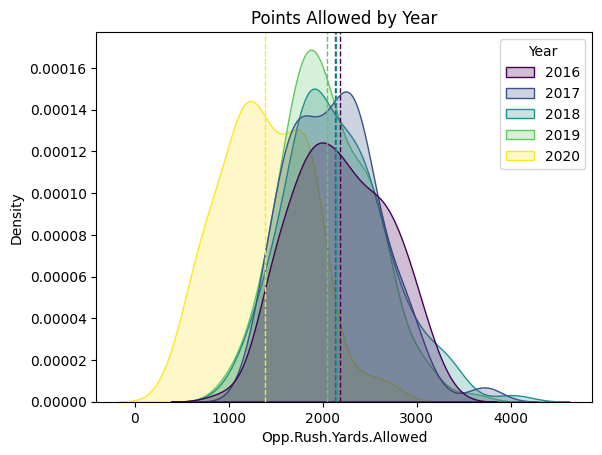

In [28]:
plt.title('Points Allowed by Year')
category = 'Opp.Rush.Yards.Allowed'
sns.kdeplot(data=df, x=category, palette='viridis', hue='Year', fill=True)
plt.axvline(np.mean(df16[category]), color='#440154', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df17[category]), color='#3b528b', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df18[category]), color='#21918c', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df19[category]), color='#5ec962', linestyle='dashed', linewidth=1, label='2016')
plt.axvline(np.mean(df20[category]), color='#fde725', linestyle='dashed', linewidth=1, label='2016')
var16 = np.var(df16[category])
var17 = np.var(df17[category])
var18 = np.var(df18[category])
var19 = np.var(df19[category])
var20 = np.var(df20[category])
print(var16, var17, var18, var19, var20)

Every year has been fairly consistent but in the year 2020 all of the defensive stats went down in a significant way. This would probably mean that there really was some missing information or an external reason for which they performed so badly in 2020 (covid)